In [2]:
# !pip install tensorflow pillow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.9/376.0 MB 16.7 MB/s eta 0:00:23
    --------------------------------------- 6.6/376.0 MB 16.1 MB/s eta 0:00:23
   - -------------------------------------- 10.2/376.0 MB 16.8 MB/s eta 0:00:22
   - -------------------------------------- 13.6/376.0 MB 16.4 MB/s eta 0:00:23
   - -------------------------------------- 17.3/376.0 MB 16.5 MB/s eta 0:00:22
   -- ------------------------------------- 20.7/376.0 MB 16.6 MB/s eta 0:00:22
   -- ------------------------------------- 24.4/376.0 MB 16.6 MB/s eta 0:00:22
   -- ------------------------------------- 27.5/376.0 MB 16.6 MB/s eta 0:00:21
   --- ------------------------------------ 29.6/376.0 MB 15.7 MB/s eta 0:00:23
   --- ------------------------------------ 33.0/376.0 MB 15.6 MB/s eta 0:00:22
   --- ------------------------------------ 36.7/376.0 MB 15.8 MB/s eta 0:00:22
   ---- ----------------------------------- 40.4/37

In [12]:
import os
import numpy as np
from PIL import Image, ImageOps
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 사용자 정의: 데이터 경로와 클래스 목록
data_dir = "data"  # 폴더 구조: Train/class_name/*.png
class_names = sorted(os.listdir(data_dir))  # 예: ['A', 'B', 'C', 'D']
num_classes = len(class_names)

# 이미지 설정
IMG_HEIGHT = 64
IMG_WIDTH = 64
CHANNELS = 3

# 데이터 로딩
X = []
y = []
for label_idx, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for fname in os.listdir(class_dir):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_dir, fname)
            img = Image.open(img_path).convert("RGB")
            img = ImageOps.equalize(img)
            img = img.resize((IMG_WIDTH, IMG_HEIGHT))
            img_arr = np.array(img).reshape(IMG_HEIGHT, IMG_WIDTH, CHANNELS)
            X.append(img_arr)
            y.append(label_idx)

X = np.array(X).astype("float32") / 255.0
y = np.array(y)
y_categorical = to_categorical(y, num_classes=num_classes)

# 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.3, random_state=42
)

# 출력 확인
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2931, 64, 64, 3)
y_train shape: (2931, 4)
X_test shape: (1257, 64, 64, 3)
y_test shape: (1257, 4)


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5268 - loss: 1.0579 - val_accuracy: 0.7995 - val_loss: 0.5067
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7850 - loss: 0.5278 - val_accuracy: 0.8393 - val_loss: 0.3979
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8509 - loss: 0.3826 - val_accuracy: 0.8377 - val_loss: 0.3922
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8883 - loss: 0.3015 - val_accuracy: 0.8417 - val_loss: 0.3811
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9125 - loss: 0.2314 - val_accuracy: 0.8512 - val_loss: 0.3543
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9469 - loss: 0.1605 - val_accuracy: 0.8512 - val_loss: 0.4545
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9589 - loss: 0.1512 - val_accuracy: 0.8488 - val_loss: 0.3791
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9692 - loss: 0.0975 - val_accuracy: 0.

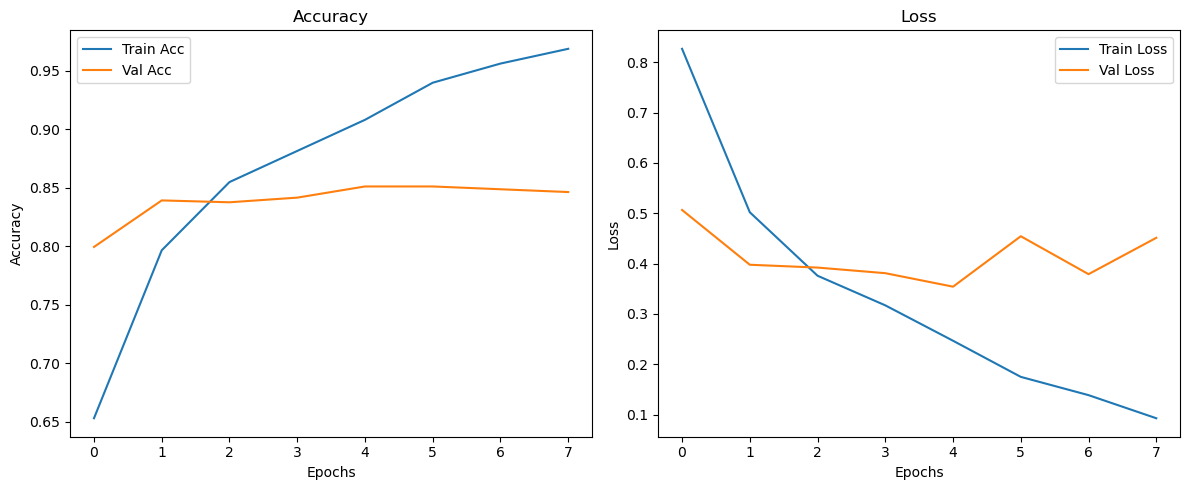

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax')  # 클래스 수에 맞게 출력
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 (optional)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# 테스트 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ 테스트 정확도: {test_acc:.4f}")

# 학습 이력 시각화
plt.figure(figsize=(12, 5))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 손실
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()